In [156]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from math import ceil


# Purpose
This Notebook is meant as a check for the VA's response to our questions, particularly about hiring.


Here is the response:

"Choice Act funding **did increase staffing**.  Choice Act funding **increased the rate of hiring** in VHA and **resulted in a 6.3% net increase of more than 18,800 additional onboard staff**. During the 17 months of the Choice Act hiring initiative **(August 1, 2014 – December 31, 2015)**, VHA **hired 56,965 employees**, of which **11,287 (20%) were hired using Choice Act funding**.  The total hires in this time frame represented a **13% increase over the level of hiring in the previous 17-month period** (March 2013-July 2014)."

## Did Choice Act Funding Increase Staffing/rate of hiring?

It's important to note that I can't check rate of hiring. What I can check is the increase in staffing. 

It's possible that hiring increased, but actual staffing levels/staffing increases did not due to increased loss or failure during the onboarding process (this could really add some relevance to Patricia's story). 

So let's actually check: was there an increase in staffing levels? 

I can only look at May 2014 to May 2016 due to the limits of the data. I'm also looking at onboard VHA employees. Since we appear to be losing people during the onboarding process, this is a really important distinction and could explain some discrepencies between VA claims and our findings.

In [125]:
# I'm only looking at the first column since that's the level for all of the VHA (I checkec MAY-FY16 and it all the other columns did add up to the VHA amount)
# I'm also dropping organization (we're only looking at VHA so we don't need to identify that) and ID isn't needed either.
Onboard = pd.read_csv("../Data/Staff_Size/Onboard_By_station_By_FY.csv").head(1).drop("ORGANIZATION",1).drop("ID",1)
print "Onboard employees by year."
Onboard.head()

Onboard employees by year.


,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16
0,268699,272538.0,283338,294444,307430,318560


### Was there an increase between MAY-FY14 and MAY-FY16

In [126]:
Difference = Onboard["MAY-FY16"].item() - Onboard["MAY-FY14"].item()
print "Staffing levels increased by {} between May 2014 and May 2016.".format(Difference)

Staffing levels increased by 24116 between May 2014 and May 2016.


So there was an increase. But previous years saw an increase too. And the VA said they hired 59,965 (during a window of time contained within May 2014 and May 2016). I only have an additional 24,116 onboard. Less than half during a longer hiring period.

Again, they could have hired a bunch of employees and failed to get them though the onboarding process. That is one explanation. 

She does say that there was a net increase of 6.3% and more than 18,800 additional onboard staff. While that is less than 24,116, it would make sense considering the time window.

What happens when we plot staffing levels by year?

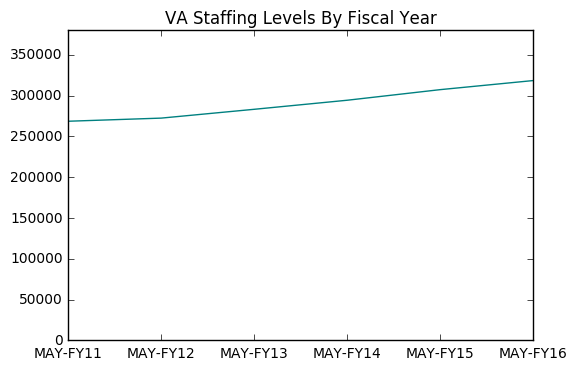

In [75]:
ax = Onboard.transpose().plot(kind="line", color="teal")
ax.set_ylim(0,380000)
ax.set_title("VA Staffing Levels By Fiscal Year")
ax.legend_.remove()

We're not seeing a significant increase over that time. The slope looks similar to previous years, actually. Let's see how much it actually increased, looking at two year periods. 

In [425]:
percent_increase_dict = {}


percent_increase_dict["11-13"] = ((Onboard["MAY-FY13"] -Onboard["MAY-FY11"])/Onboard["MAY-FY11"])*100
percent_increase_dict["12-14"] = ((Onboard["MAY-FY14"] -Onboard["MAY-FY12"])/Onboard["MAY-FY12"])*100
percent_increase_dict["13-15"] = ((Onboard["MAY-FY15"] -Onboard["MAY-FY13"])/Onboard["MAY-FY13"])*100
percent_increase_dict["14-16"] = ((Onboard["MAY-FY16"] -Onboard["MAY-FY14"])/Onboard["MAY-FY14"])*100

percent_increase = pd.DataFrame.from_dict(percent_increase_dict)
print "Percent increase in onboard staff over two year periods."
percent_increase

Percent increase in onboard staff over two year periods.


,11-13,12-14,13-15,14-16
0,5.448104,8.037778,8.502919,8.190352


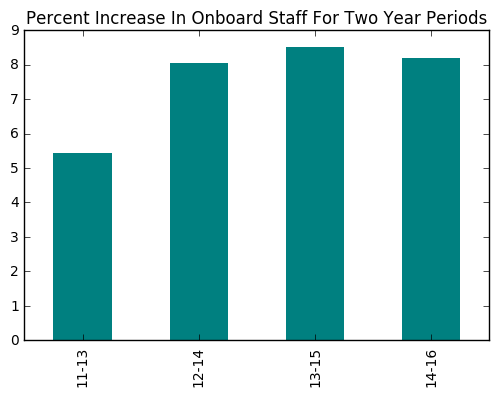

In [129]:
ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In Onboard Staff For Two Year Periods")
ax.legend_.remove()

There is an increase in staffing levels (8.19 percent) from 2014 to 2016, which would make sense with the VA's 6.3 percent claim. 

However, this increase is barely larger than increases in previous years. 

In [78]:
percentage_points = percent_increase_dict["14-16"].item() - percent_increase_dict["12-14"].item()
print "This is only {} percentage points more than 2012 to 2014.".format(round(percentage_points,2))

This is only 0.15 percentage points more than 2012 to 2014.


### So was there an increase in staffing from 2014 to 2016?

Yes, but barely any more than 2012 to 2014. 


What happens when we remove choice acts from this list?

Disclaimer - I have choice hires as of 9/15/16, a full four months after my May 2016 staffing numbers. This shouldn't be used for calculating exact numbers, but subtracting these choice hires from onboard staffing will give us some idea as to how many were choice hires (VA said there were 11,287 hires before May 2016 so there isn't much of a difference). 

In [79]:
choice_hires = pd.read_csv("../Data/Hiring/Hiring_Clean_All_Positions.csv")
choice_hires_total = choice_hires["NbrEmps"].sum()
MAY_FY16_no_choice_hires = Onboard["MAY-FY16"].item() -Onboard["MAY-FY14"].item() - choice_hires_total.item()
#percent_increase_dict["14-16 No Choice Hires"] = ((MAY_FY16_no_choice_hires - Onboard["MAY-FY14"].item())/Onboard["MAY-FY14"].item())
"There were {} choice act hires still employed at the VA as of 9/15/16. If we subtract this from the May-FY16 staffing increase, we"\
" see about {} onboard employees hired around this period were not choice hires.".format(choice_hires_total,MAY_FY16_no_choice_hires)

'There were 12308 choice act hires still employed at the VA as of 9/15/16. If we subtract this from the May-FY16 staffing increase, we see about 11808 onboard employees hired around this period were not choice hires.'

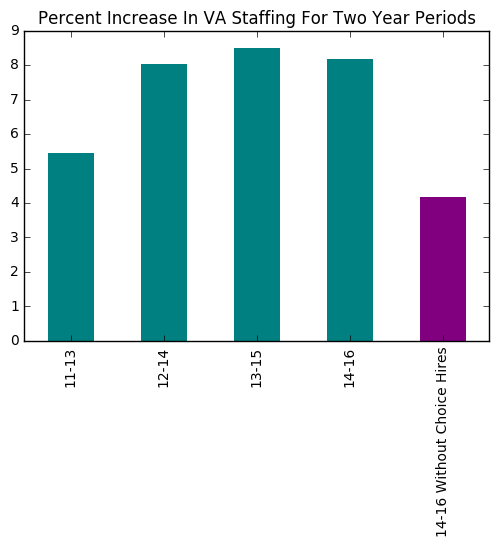

In [80]:
percent_increase_dict["14-16 Without Choice Hires"] = ((Onboard["MAY-FY16"] -Onboard["MAY-FY14"]-MAY_FY16_no_choice_hires)/Onboard["MAY-FY14"])*100





percent_increase = pd.DataFrame.from_dict(percent_increase_dict)

ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()

What we should be seeing is that the purple bar (2014-2016 without choice hires) is at a similar height to 2012-2014 or even 2011-2013. Instead, the increase we saw in previous years without choice hires is significantly smaller. 

## Instead of adding a signifcant addition to the VA's usual staffing levels, the choice hire were used in lieu of the usual staffing increases. 

### So how much did staffing increases, well, increase?


In [115]:
Increase_2014_2016 = Onboard["MAY-FY16"].item() - Onboard["MAY-FY14"].item()
Increase_2012_2014 = Onboard["MAY-FY14"].item() - Onboard["MAY-FY12"].item()

Increase = round(((Increase_2014_2016 - Increase_2012_2014)/Increase_2012_2014)*100,2)

print "Staffing increased by {} employees from 2012 to 2014"\
" and by {} from 2014 to 2016."\
" This represent a {} percent increase in the increase in staffing.".format(Increase_2012_2014,Increase_2014_2016,Increase)


Staffing increased by 21906.0 employees from 2012 to 2014 and by 24116 from 2014 to 2016. This represent a 10.09 percent increase in the increase in staffing.


10 percent isn't bad, but what's important to note is that this is an increase of an increase. Another way to look at is it is only a .15 percentage point difference. 

# Let's go through the VHA's claims again, one by one.

### "Funding did increase staffing"

Staffing did increase, but not significantly more than the previous period. 

### "Choice Act funding increased the rate of hiring "

Certainly possible. We don't have hiring numbers. If this is true, a lot of people being hired are not making it through the onboarding process.

### "6.3 percent net increase of more than 18,800 additional onboard staff."

I don't have the exact same time from for this, but the numbers make sense with what I'm seeing, with May 2014 to 2016 seeing a 8.19 percent increase in onboard staff (24,116) . However, May 2012 to 2014 saw an increase of 8.04 percent (21,906). The increase does not seem very significant when put in that context. 

### "During the 17 months of the Choice Act hiring initiative (August 1, 2014 – December 31, 2015), VHA hired 56,965 employees"

Again, can't verify hiring numbers.

### "11,287 (20%) were hired using Choice Act funding."

This is interesting because this is very similar to the numbers I'm seeing for choice hires (12,308). Yet Choice hires make up way more than 20 percent of the onboard staff, from what I can tell. And while choice hires have increased in numbers of actual onboard staffing since then, we're not seeing general hiring numbers anywhere close to 59,965 (only 24,116 increase in onboard between May 2014 and May 2016.

### "The total hires in this time frame represented a 13% increase over the level of hiring in the previous 17-month period (March 2013-July 2014)."

Once again, I can't look at hires and I have a different time frame. But we do see a 10 percent increase in the increase in staffing in 2014 to 2016 compared to 2012 to 2014. It's the percent of a percent increase so 10 percent seems like a bigger number than it actually represents. A .15 percentage point difference between the two time frames is another way to look at it.

## Here's one final graph looking at just the raw staffing numbers to give an idea of how little staffing has actually increased.

(It's the same as the line graph on the top of the page, just using bars instead).

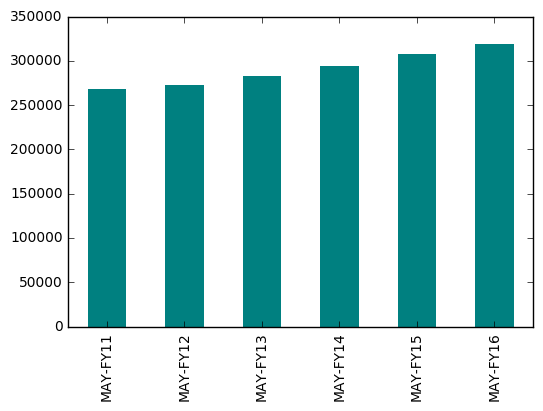

In [123]:
ax = Onboard.transpose().plot(kind="bar",color = 'teal', edgecolor="none")
ax.legend_.remove()

# So how much did it cost per hire?

" Of the \$5B provided by VACAA, $2.213B was dedicated to the hiring of clinicians and medical support staff by the end of FY2016."


So 2.213 billion was dedicated to hiring. And they hired 12308. So how much does that work out per person?


In [225]:
for_hiring = 2213000000

12308

In [230]:
from __future__ import division
for_hiring / choice_hires_total

179801.7549561261

In [231]:
choice_hires_total

12308

## So that's looking at choice hires. But what we just look at the amount they hired more than previous years.

In [238]:
increase_dict = {}


increase_dict["11-13"] = Onboard["MAY-FY13"] -Onboard["MAY-FY11"]
increase_dict["12-14"] = Onboard["MAY-FY14"] -Onboard["MAY-FY12"]
increase_dict["13-15"] = Onboard["MAY-FY15"] -Onboard["MAY-FY13"]
increase_dict["14-16"] = Onboard["MAY-FY16"] -Onboard["MAY-FY14"]

increase = pd.DataFrame.from_dict(increase_dict)
increase

,11-13,12-14,13-15,14-16
0,14639,21906.0,24092,24116


In [242]:
additional_increase = increase["14-16"].item() - increase["12-14"].item()
for_hiring/additional_increase

1001357.4660633485

In [243]:
additional_increase

2210.0

# We should really see how much the annual budget is and see if we can determine a connection with more money more hires

In [270]:
budget = pd.read_csv("../Data/VA_Budget/VA_Budget.csv")
budget["budget"] = budget["budget"]*1000

In [272]:
budget_list = []
budget_increase = None
previous_year = None
for index, row in budget.iterrows():
    if previous_year:
        budget_increase = row["budget"] - previous_year
        budget_list.append(budget_increase)
        previous_year = row["budget"]
    else:
        previous_year=row["budget"]
        budget_list.append(budget_increase)

budget["increase"] = budget_list

In [448]:
budget_list

[None, 3345330000, 2451755000, 2464945000, 1835489000, 1584659000, 4176797000]

In [449]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
budget

,year,budget,status,increase
0,2010,47329065000,enacted,nan
1,2011,50674395000,enacted,3345330000.000
2,2012,53126150000,enacted,2451755000.000
3,2013,55591095000,enacted,2464945000.000
4,2014,57426584000,enacted,1835489000.000
5,2015,59011243000,estimate,1584659000.000
6,2016,63188040000,estimate,4176797000.000


In [451]:
print budget

   year       budget    status       increase
0  2010  47329065000   enacted            nan
1  2011  50674395000   enacted 3345330000.000
2  2012  53126150000   enacted 2451755000.000
3  2013  55591095000   enacted 2464945000.000
4  2014  57426584000   enacted 1835489000.000
5  2015  59011243000  estimate 1584659000.000
6  2016  63188040000  estimate 4176797000.000


   year       budget    status       increase
0  2010  47,329,065,000   enacted           
1  2011  50,674,395,000   enacted 3,345,330,000.000
2  2012  53,126,150,000   enacted 2,451,755,000.000
3  2013  55,591,095,000   enacted 2,464,945,000.000
4  2014  57,426,584,000   enacted 1,835,489,000.000
5  2015  59,011,243,000  estimate 1,584,659,000.000
6  2016  63,188,040,000  estimate 4,176,797,000.000

In [280]:
#Onboard = Onboard.transpose()
Onboard["year"] = [2011,2012,2013,2014,2015,2016]
Onboard

,0,year
MAY-FY11,268699.0,2011
MAY-FY12,272538.0,2012
MAY-FY13,283338.0,2013
MAY-FY14,294444.0,2014
MAY-FY15,307430.0,2015
MAY-FY16,318560.0,2016


In [282]:
Onboard.columns = ["staff","year"]

In [289]:
onboard_list = []
onboard_increase = None
previous_year = None
for index, row in Onboard.iterrows():
    if previous_year:
        onboard_increase = row["staff"] - previous_year
        onboard_list.append(onboard_increase)
        previous_year = row["staff"]
    else:
        previous_year=row["staff"]
        onboard_list.append(onboard_increase)
Onboard["staff_increase"] = onboard_list
Onboard

,staff,year,staff_increase
MAY-FY11,268699.0,2011,NaN
MAY-FY12,272538.0,2012,3839.0
MAY-FY13,283338.0,2013,10800.0
MAY-FY14,294444.0,2014,11106.0
MAY-FY15,307430.0,2015,12986.0
MAY-FY16,318560.0,2016,11130.0


In [291]:
df = Onboard.merge(budget,on="year")

In [292]:
df

,staff,year,staff_increase,budget,status,increase
0,268699.0,2011,NaN,50674395000,enacted,3.345330e+09
1,272538.0,2012,3839.0,53126150000,enacted,2.451755e+09
2,283338.0,2013,10800.0,55591095000,enacted,2.464945e+09
3,294444.0,2014,11106.0,57426584000,enacted,1.835489e+09
4,307430.0,2015,12986.0,59011243000,estimate,1.584659e+09
5,318560.0,2016,11130.0,63188040000,estimate,4.176797e+09


In [293]:
df["staff_increase_per_budget_increase"] = df["staff_increase"]/df["increase"]

In [303]:
df

,staff,year,staff_increase,budget,status,increase,staff_increase_per_budget_increase
0,268699.0,2011,NaN,50674395000,enacted,3.345330e+09,NaN
1,272538.0,2012,3839.0,53126150000,enacted,2.451755e+09,0.000002
2,283338.0,2013,10800.0,55591095000,enacted,2.464945e+09,0.000004
3,294444.0,2014,11106.0,57426584000,enacted,1.835489e+09,0.000006
4,307430.0,2015,12986.0,59011243000,estimate,1.584659e+09,0.000008
5,318560.0,2016,11130.0,63188040000,estimate,4.176797e+09,0.000003


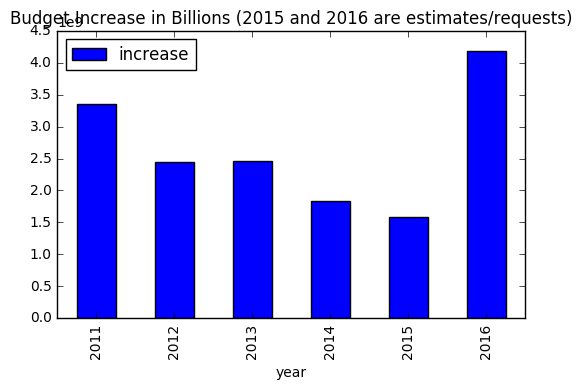

In [309]:
ax = df.plot(kind='bar',x='year',y='increase')
ax.set_title("Budget Increase in Billions (2015 and 2016 are estimates/requests)")
plt.tight_layout()

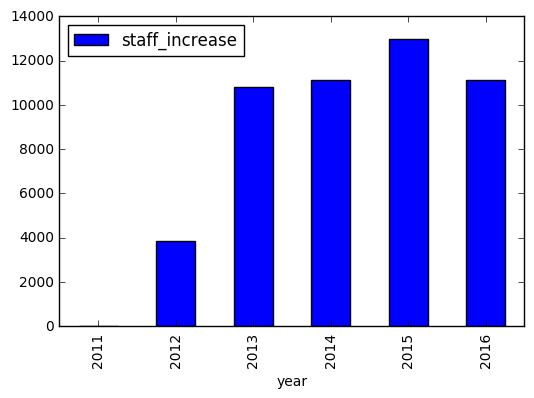

In [307]:
df.plot(kind='bar',x='year',y='staff_increase')

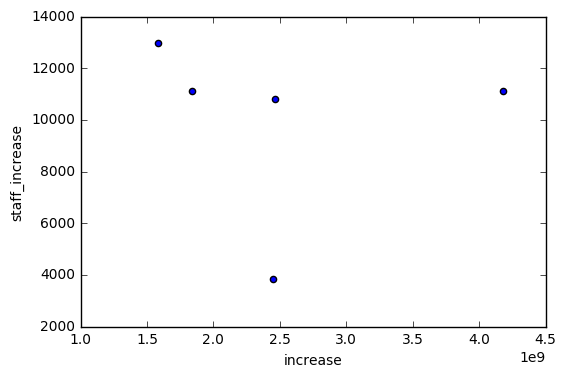

In [302]:
df.plot(kind='scatter',x='increase',y='staff_increase')

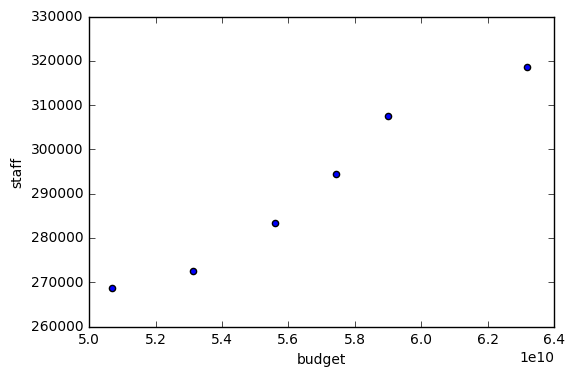

In [304]:
df.plot(kind='scatter',x='budget',y='staff')

In [319]:
#looking at FY12,13 and 14 to see what the increase was and get the mean. 
Onboard.head(4).tail(3)["staff_increase"].mean()

8581.6666666666661

In [322]:
Onboard.head(4).tail(3)["staff_increase"]

MAY-FY12     3839.0
MAY-FY13    10800.0
MAY-FY14    11106.0
Name: staff_increase, dtype: float64

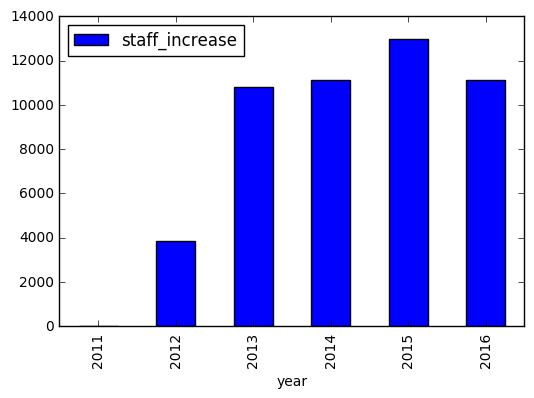

In [329]:
Onboard.plot(kind='bar',y="staff_increase",x='year')

In [400]:
Onboard = pd.read_csv("../Data/Staff_Size/Onboard_By_station_By_FY.csv").head(1).drop("ORGANIZATION",1).drop("ID",1)

staff_increase_dict = {}


#staff_increase_dict["11-13"] = Onboard["MAY-FY13"] -Onboard["MAY-FY11"]
staff_increase_dict["12-14"] = Onboard["MAY-FY14"] -Onboard["MAY-FY12"]
#staff_increase_dict["13-15"] = Onboard["MAY-FY15"] -Onboard["MAY-FY13"]
staff_increase_dict["14-16"] = Onboard["MAY-FY16"] -Onboard["MAY-FY14"]
staff_increase_dict["14-16_without_choice"] = Onboard["MAY-FY16"] -Onboard["MAY-FY14"] - choice_hires_total

staff_increase = pd.DataFrame.from_dict(staff_increase_dict)
staff_increase = staff_increase.transpose().reset_index()
staff_increase.columns = ["Year","Raw Increase In Staff"]

In [401]:
staff_increase

,Year,Raw Increase In Staff
0,12-14,21906.0
1,14-16,24116.0
2,14-16_without_choice,11808.0


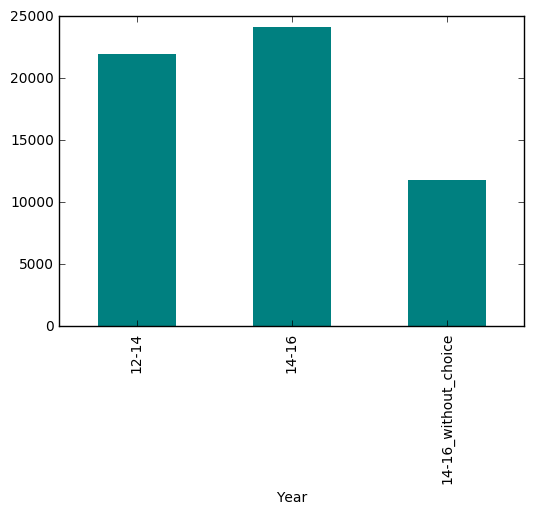

In [436]:
ax = staff_increase.plot(kind='bar',x="Year",y="Raw Increase In Staff",color = 'teal',edgecolor='none')
ax.legend_.remove()

In [445]:
percent_increase

,11-13,12-14,13-15,14-16
0,5.448104,8.037778,8.502919,8.190352


In [404]:
budget["increase"][4]

1835489000.0

In [435]:
# The Math
difference = staff_increase["Raw Increase In Staff"][1] - staff_increase["Raw Increase In Staff"][0]
percent_more = round((difference/staff_increase["Raw Increase In Staff"][0])*100)
percent_of_budget = round(budget["budget"][4]/for_hiring)
percent_difference = percent_increase["14-16"].item() - percent_increase["12-14"].item()
# Statement
print "Between 2014 and 2016, staffing levels went up by {} onboard employees.".format(staff_increase["Raw Increase In Staff"][1])
print "From 2012 to 2014, staffing levels went up by {} onboard employees.".format(staff_increase["Raw Increase In Staff"][0])
print "That means there were {} more employees added between 2014 and 2016 compared to 2012 and 2014.".format(difference)
print "Which means that {} choice hires being hired using an allocated {},".format(choice_hires_total,for_hiring)
print "an amount equivelant to {} percent of the VHA's entire 2014 budget,".format(percent_of_budget)
print "there was only {} percent more staff was added versus 2012 to 2014.".format(percent_more)
print "Or to put it another day, a {} percentage point difference.".format(percent_difference)



Between 2014 and 2016, staffing levels went up by 24116.0 onboard employees.
From 2012 to 2014, staffing levels went up by 21906.0 onboard employees.
That means there were 2210.0 more employees added between 2014 and 2016 compared to 2012 and 2014.
Which means that 12308 choice hires being hired using an allocated 2213000000,
an amount equivelant to 26.0 percent of the VHA's entire 2014 budget,
there was only 10.0 percent more staff was added versus 2012 to 2014.
Or to put it another day, a 0.152573767354 percentage point difference.


In [428]:
percent_increase["14-16"].item() - percent_increase["12-14"].item()

0.15257376735361028

In [366]:
Onboard["MAY-FY16"] -Onboard["MAY-FY14"]

0    24116
dtype: int64

### Let's figure out their hiring rate. 


In [398]:
# The Math
amount_hired = 59965
time_period_months = 17
hires_per_month = round(amount_hired/time_period_months)
projected_hires_two_years = round(hires_per_month*24)
increase_2014_2016 = round(Onboard["MAY-FY16"].item() -Onboard["MAY-FY14"].item())
difference = round(projected_hires_two_years - increase_2014_2016)
turnover_in_2014 = round(Onboard["MAY-FY14"].item()*.09)
turnover_in_2015 = round(Onboard["MAY-FY15"].item()*.09)
loss_from_turnover = round(turnover_in_2014 + turnover_in_2015)
difference_subtrated_turnover = round(difference - loss_from_turnover)
percent_of_hires_missing = round(projected_hires_two_years/difference_subtrated_turnover)
# The Statement

print "Ndidi said they hired {} people in {} months.".format(amount_hired, time_period_months)
print "That comes out to hires {} per month.".format(hires_per_month)
print "Across 24 months, that would be a projected {} hires.".format(projected_hires_two_years)
print "Yet they only increased their staff by {}.".format(increase_2014_2016)
print "That leaves a difference of {}".format(difference)
print "Now, some of these could be because of turnover. Shulkin said they were seeing a 9 percent turnover rate."
print "So let's apply that 9 percent turnover rate. That would mean a projected {} employees were lost to"\
" turnover during that two year period.".format(loss_from_turnover)
print "That leaves us with a projecting {} missing hires.".format(difference_subtrated_turnover)
print "That would mean {} percent of the  hires never made it to being onboard.".format(percent_of_hires_missing)

Ndidi said they hired 59965 people in 17 months.
That comes out to hires 3527.0 per month.
Across 24 months, that would have been 84648.0 hires.
Yet they only increased their staff by 24116.0.
That leaves a difference of 60532.0
Now, some of these could be because of turnover. Shulkin said they were seeing a 9 percent turnover rate.
So let's apply that 9 percent turnover rate. That would mean a projected 54169.0 employees were lost to turnover during that two year period.
That leaves us with a projecting 6363.0 missing hires.
That would mean 13.0 percent of the  hires never made it to being onboard.


In [442]:
choice_hires_total

12308

In [440]:
difference_subtrated_turnover

6363.0

In [443]:
difference_subtrated_turnover/choice_hires_total

0.516980825479363

In [444]:
budget

,year,budget,status,increase
0,2010,47329065000,enacted,NaN
1,2011,50674395000,enacted,3.345330e+09
2,2012,53126150000,enacted,2.451755e+09
3,2013,55591095000,enacted,2.464945e+09
4,2014,57426584000,enacted,1.835489e+09
5,2015,59011243000,estimate,1.584659e+09
6,2016,63188040000,estimate,4.176797e+09


In [447]:
budget["increase"]

0             NaN
1    3.345330e+09
2    2.451755e+09
3    2.464945e+09
4    1.835489e+09
5    1.584659e+09
6    4.176797e+09
Name: increase, dtype: float64

# VA also mentioned how they distributed choice hires. Let's see if we can check that out.

### Va Response:

"At the direction of VHA CO leadership, VHA directed a **5% proportional prioritization** of the VACAA 801 funds distribution to **30 VAMCs experiencing the greatest challenges with Veterans access.**  Since access remained a critical priority across the entire VA Health Care System, **the remaining funds were distributed proportionally** across all sites, **based upon the Veterans population to be served.**"

### the proxies:

- Veterans access - Percent over 30 days to see an appointment. 
- Veterans population served - appointments? Could later bring in census data.

In [147]:
df = pd.read_csv("../Data/Master/Master.csv").sort("%_Appts_Over_30_Pending_1412",ascending=False)
df["%_Appts_Over_30_Pending_1412"].head(30)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


45     24.23
33     20.32
34     19.44
86     16.61
44     15.31
108    14.22
50     13.93
99     13.57
21     13.33
73     13.25
123    13.08
92     13.02
98     12.72
102    12.12
105    11.92
103    11.56
122    11.53
113    11.37
125    10.87
60     10.69
38     10.62
110    10.37
131     9.95
130     9.40
25      9.30
118     9.26
5       9.26
106     9.24
55      9.14
77      9.00
Name: %_Appts_Over_30_Pending_1412, dtype: float64

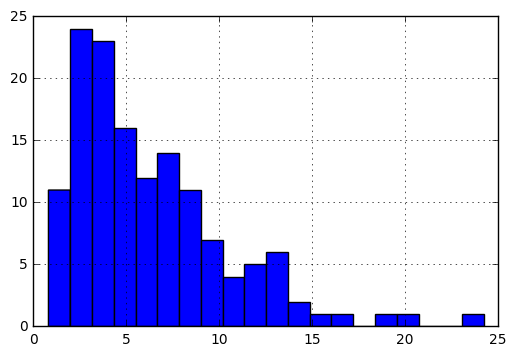

In [168]:
df["%_Appts_Over_30_Pending_1412"].hist(bins=20)

In [169]:
mark = []
for index, row in df.iterrows():
    if row["%_Appts_Over_30_Pending_1412"] >= 15:
        mark.append("Worst")
    elif row["%_Appts_Over_30_Pending_1412"] >= 10:
        mark.append("Bad")
    elif row["%_Appts_Over_30_Pending_1412"] >= 5:
        mark.append("Need Improvement")
    elif row["%_Appts_Over_30_Pending_1412"] >= 0:
        mark.append("better")
df["Mark"] = mark

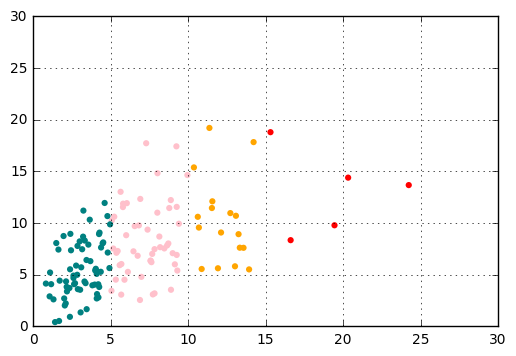

In [176]:



fig, ax = plt.subplots()

colors = { 'Worst':'red','Bad':'orange','Need Improvement':'pink','better':'teal'}
ax.scatter(df["%_Appts_Over_30_Pending_1412"], df["%_Appts_Over_30_Pending_1610"], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.grid()
ax.set_ylim(0,30)
ax.set_xlim(0,30)

plt.show()

In [165]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'for_dups', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'ID',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'NbrPsychiatrists', u'Pending_In

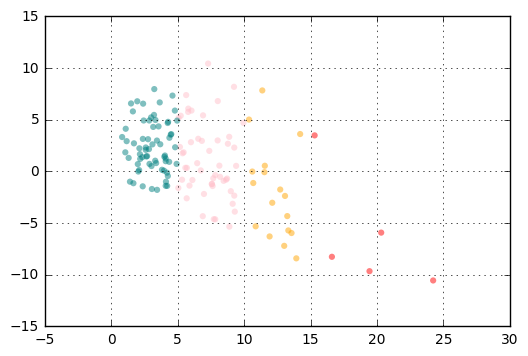

In [177]:
fig, ax = plt.subplots()

ax.scatter(df["%_Appts_Over_30_Pending_1412"], df['Percentage_Point_Wait_Over_30_Increase_Pending'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
ax.grid()


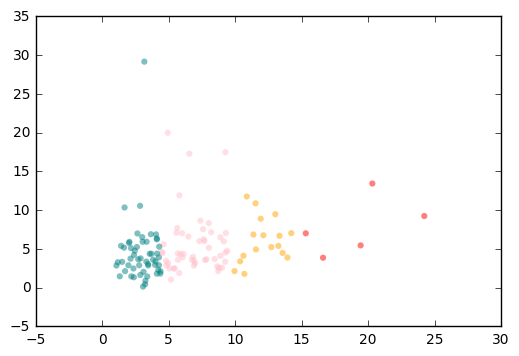

In [179]:
fig, ax = plt.subplots()

ax.scatter(df["%_Appts_Over_30_Pending_1412"], df['Choice_Increase_%'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
#ax.grid()

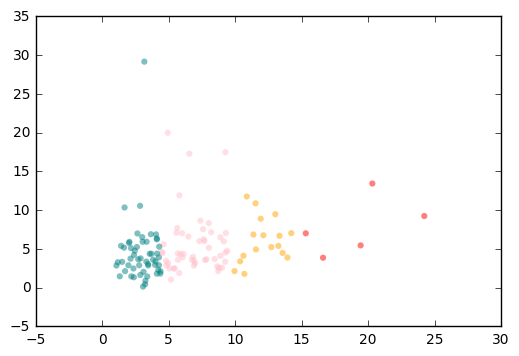

In [181]:
fig, ax = plt.subplots()

ax.scatter(df["%_Appts_Over_30_Pending_1412"], df['Choice_Increase_%'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
#ax.grid()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df["%_Appts_Over_30_Pending_1412"], df['Choice_Increase_%'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
#ax.grid()

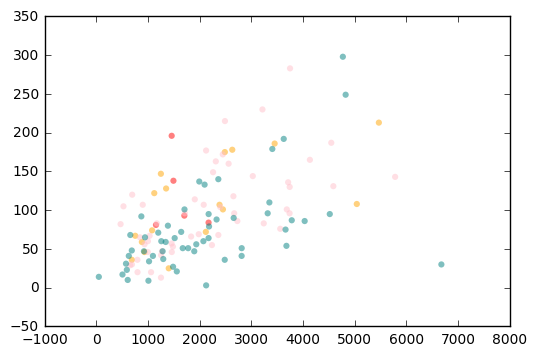

In [182]:
fig, ax = plt.subplots()

ax.scatter(df["MAY-FY14"], df['Choice_Hires'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
#ax.grid()

# Using Appointments as proxy 

In [217]:
hires = df[df["Choice_Increase_%"].notnull()]
hires = df[df["MAY-FY14"] > 500]
mark = []
for index, row in hires.iterrows():
    if row["Choice_Increase_%"] >= 15:
        mark.append("huge increase")
    elif row["Choice_Increase_%"] >= 12:
        mark.append("big increase")
    elif row["Choice_Increase_%"] >= 5:
        mark.append("above average")
    elif row["Choice_Increase_%"] >= 0:
        mark.append("below average")
hires["Mark"] = mark

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


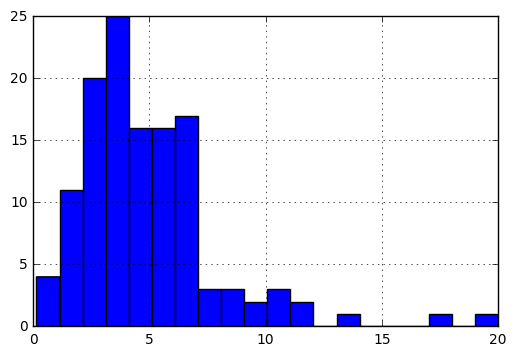

In [218]:
hires["Choice_Increase_%"].hist(bins=20)

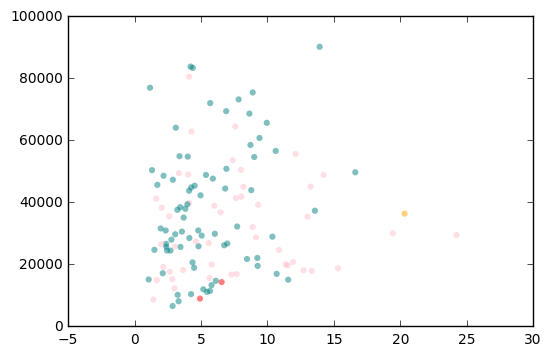

In [219]:
fig, ax = plt.subplots()
colors = { 'huge increase':'red','big increase':'orange','above average':'pink','below average':'teal'}

ax.scatter(hires["%_Appts_Over_30_Pending_1412"], hires["Appts_Complete_1409"], c=hires['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
#ax.grid()

In [204]:
hires["Choice_Increase_%"].quantile(q=.25)

2.8956530766249999

In [208]:
df["Appts_Complete_1409"]

45     29482
33     36397
34     30057
86     49730
44     18733
108    48874
50     90218
99     37335
21     17926
73     45087
123    64997
92     35431
98     18101
102    55618
105    20803
103    15069
122    19732
113    20010
125    24654
60     16966
38     56618
110    28963
131    65683
130    60802
25     39256
118    10517
5      19536
106    22091
55     28712
77     54663
       ...  
57     47323
111     6596
121    15226
63     27992
0      24458
4      17616
80     31391
26     35530
91     24501
11     13449
94     25728
15     26650
17     30955
7      48622
1      19232
76     17161
120     2292
56     38286
24     26534
68     31610
3      45669
19     14938
84     41239
71     24707
20      8692
16     50405
51     77005
78     24293
22     15159
138    44645
Name: Appts_Complete_1409, dtype: int64

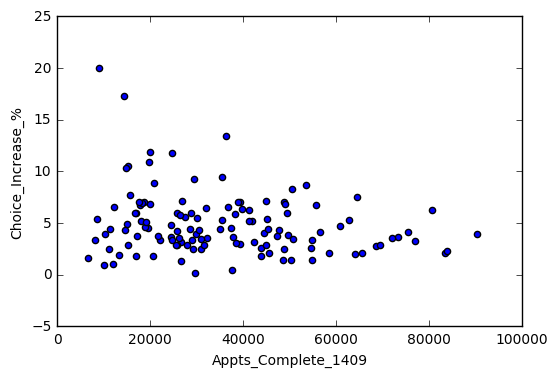

In [222]:
hires.plot(kind='scatter',x="Appts_Complete_1409",y='Choice_Increase_%')

In [220]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'for_dups', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'ID',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'NbrPsychiatrists', u'Pending_In

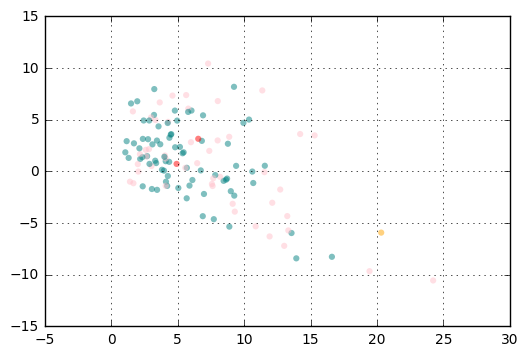

In [223]:
fig, ax = plt.subplots()

ax.scatter(hires["%_Appts_Over_30_Pending_1412"], hires['Percentage_Point_Wait_Over_30_Increase_Pending'], c=hires['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
ax.grid()
